In [1]:
from standardInclude import *

from fit_util import *
from omega_a_fitting import *
from pileup_correction import *
from lost_muon_calculation import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f = r.TFile("../truncationTest/data/results_1MissingFile_FullVsTrunc.root")
f.cd("clustersAndCoincidences")
f.ls()

TFile**		../truncationTest/data/results_1MissingFile_FullVsTrunc.root	
 TFile*		../truncationTest/data/results_1MissingFile_FullVsTrunc.root	
  TDirectoryFile*		clustersAndCoincidences	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
   KEY: TH3I	clusters;1	clusters
   KEY: TH2I	triples;1	triples
   KEY: TH2I	coincidenceTimeDiffs;1	coincidence time differences
   KEY: TH2I	quadruples;1	quadruples
   KEY: TH1I	coincidenceEnergies;1	coincidence energies
   KEY: TH2I	backwardsTriples;1	backwards triples
   KEY: TH2I	backwardsCoincidenceTimeDiffs;1	backwards coincidence time differences
   KEY: TH1I	backwardsCoincidenceEnergies;1	backwards coincidence energies
   KEY: TH1I	ctag;1	ctag
  KEY: TDirectoryFile	clustersAndCoincidences;1	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	clustersAndCoincidencesTrunc;1	clustersAndCoincidencesTrunc (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	farline;1	farline (CaloFarlineHistog

In [3]:
clusters = f.Get("clustersAndCoincidences").Get("clusters")
#clusters = f.Get("clustersAndCoincidencesTrunc").Get("clusters")
print(clusters)

<ROOT.TH3I object ("clusters") at 0x7fffd4ace820>


In [17]:
#f = r.TFile("./PileupCorrection_TcOver6Binning_FullIslands_2019_07_17.root")
f = r.TFile("./PileupCorrection_TcOver6Binning_TruncIslands_WithTriples_2019_07_24_11_46_05.root")
f.ls()

TFile**		./PileupCorrection_TcOver6Binning_TruncIslands_WithTriples_2019_07_24_11_46_05.root	
 TFile*		./PileupCorrection_TcOver6Binning_TruncIslands_WithTriples_2019_07_24_11_46_05.root	
  KEY: TTree	t;10	Variable Tree
  KEY: TTree	t;9	Variable Tree
  KEY: TTree	t;8	Variable Tree
  KEY: TTree	t;7	Variable Tree
  KEY: TTree	t;6	Variable Tree
  KEY: TTree	t;5	Variable Tree
  KEY: TTree	t;4	Variable Tree
  KEY: TTree	t;3	Variable Tree
  KEY: TTree	t;2	Variable Tree
  KEY: TTree	t;1	Variable Tree
  KEY: TH2D	h;4	clusters yx projection
  KEY: TH2D	h;3	clusters yx projection
  KEY: TH2D	h;2	clusters yx projection
  KEY: TH2D	h;1	clusters yx projection
  KEY: TH1D	h_y;1	clusters yx projection
  KEY: TNamed	name;1	6binning
  KEY: TNamed	fitOptions;1	R
  KEY: TH2D	rhoDouble;1	clusters yx projection
  KEY: TH2D	doublePileup;4	Double Pileup [Unscaled]
  KEY: TH2D	doublePileup;3	Double Pileup [Unscaled]
  KEY: TH2D	doublePileup;2	Double Pileup [Unscaled]
  KEY: TH2D	doublePileup;1	Double Pileup [

In [18]:
t = f.Get("t")
t.Draw("doublePileupOnlyScaleFactor","","goff")
pileupFactor = t.GetV1()[0]
print(pileupFactor)
t.Print()

3.0517002258534376e-09
******************************************************************************
*Tree    :t         : Variable Tree                                          *
*Entries :        1 : Total =            3393 bytes  File  Size =       1176 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************
*Br    0 :iteration : iteration/F                                            *
*Entries :        1 : Total  Size=        578 bytes  File Size  =         77 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :deltat    : deltat/F                                               *
*Entries :        1 : Total  Size=        563 bytes  File Size  =         74 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................

In [19]:
clusters = f.Get("h").Clone()
pileup = f.Get("doublePileup").Clone()
pileup.Scale(pileupFactor*0.3)
clusters.Add(pileup, -1)

clusters.Rebin2D(6,1)

<ROOT.TH2D object ("h") at 0x7fffd5d01e40>

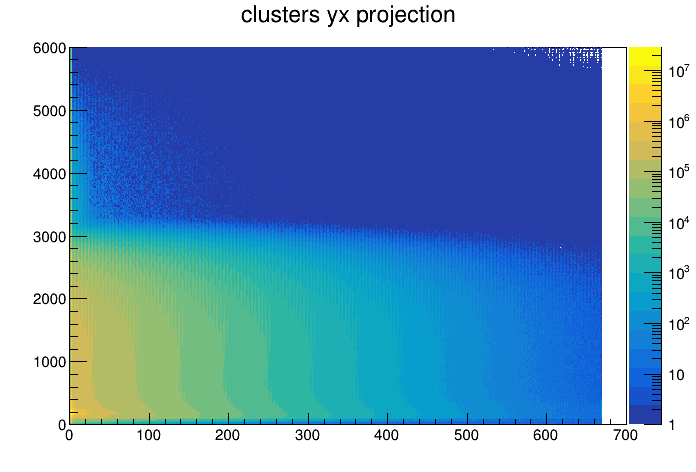

In [20]:
c = r.TCanvas()
clusters.Draw("colz")
c.SetLogz()
c.Draw()

In [21]:
from energy_threshold_scan import *

---

# Set parameters and do test with all calos

In [22]:
e1_nominal = 1700
deltaE = 200
e2 = 6000
binOrEnergy = "energy"
upperOrLower = "lower"
verbosity = 1

calo = 0

In [23]:
ding = EnergyThresholdScan(clusters, e1_nominal, e2, deltaE, binOrEnergy, calo,  upperOrLower, verbosity, 2, 2)

Bins to loop over:  [76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]
Looping over bins: 
    Starting bin 76
Dumping:  <omega_a_fitting.MakeWiggleFromTH2 object at 0x7f9a5984aa90>
Class:  <class 'omega_a_fitting.MakeWiggleFromTH2'>
    elow = 76
    ehigh = 301
    timeScaleFactor = 1
    caloNum = 0
    isPileupCorrected = False
    BinOrEnergy = bin
    title = Wiggle Plot for [76 < E (Bin) < 301] in Calo 0
    ebinlow = 76
    ebinhigh = 301
    h = <ROOT.TH1D object ("wiggle_76_301_0") at 0x7f9a5015fe80>
Starting fit 1 / 2
Parameters from this fit: 
     ChiSq/NDF =  13204.57999067658 / 4151 = 3.1810599832995856
      N  =  10164167.23672027 +/- 345.6885289799809
      #tau_{#mu}  =  64.40381686198447 +/- 0.0012339318224812458
      A  =  0.32086186113349585 +/- 2.587829813655481e-05
      R  =  -47.0995156752501 +/- 0.8949093296849117
      #phi_{a}  =  -1.061072246065623 +/- 0.00014672432027110362
Starting fit 2 / 2
Parameters from this fit: 
 

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the glob

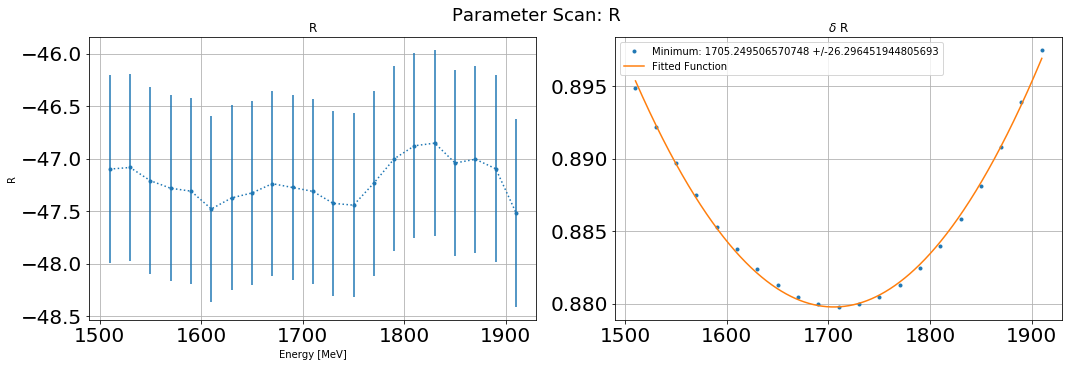


****************************************
Minimizer is Linear
Chi2                      =  1.28099e-06
NDf                       =           18
p0                        =      2.06918   +/-   0.0129814   
p1                        =  -0.00139499   +/-   1.52362e-05 
p2                        =  4.09029e-07   +/-   4.45282e-09 

****************************************
Minimizer is Linear
Chi2                      =  1.28099e-06
NDf                       =           18
p0                        =      2.06918   +/-   0.0129814   
p1                        =  -0.00139499   +/-   1.52362e-05 
p2                        =  4.09029e-07   +/-   4.45282e-09 


In [24]:
ding.PlotParameterVsBin(3)

---

### Now loop over all calos

Starting calo 0


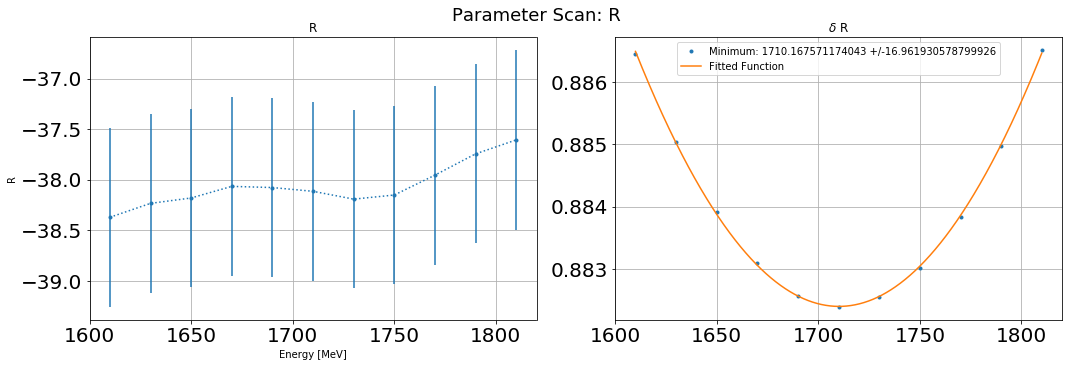

Starting calo 1


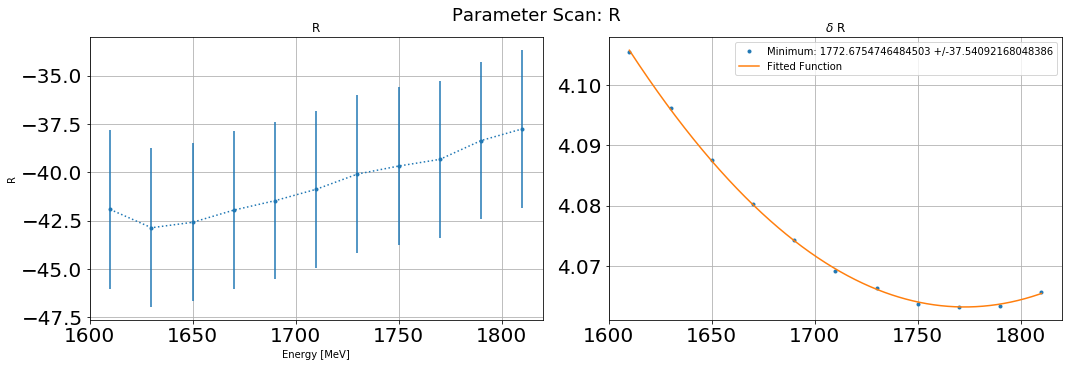

Starting calo 2


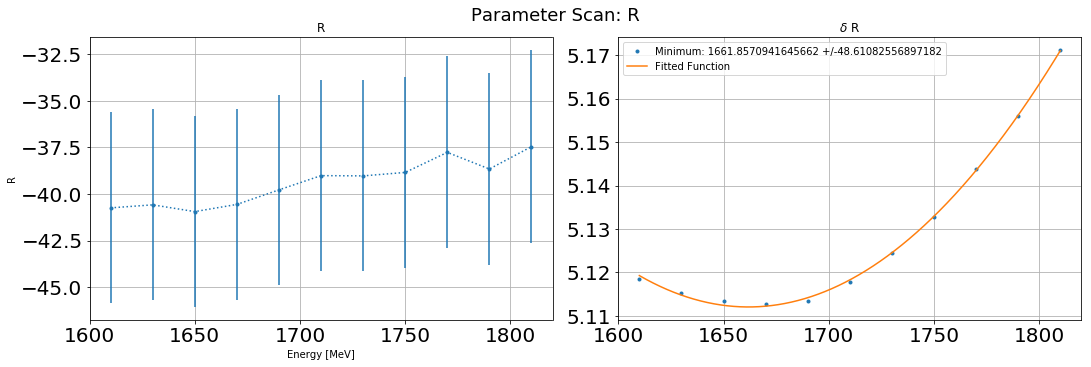

Starting calo 3


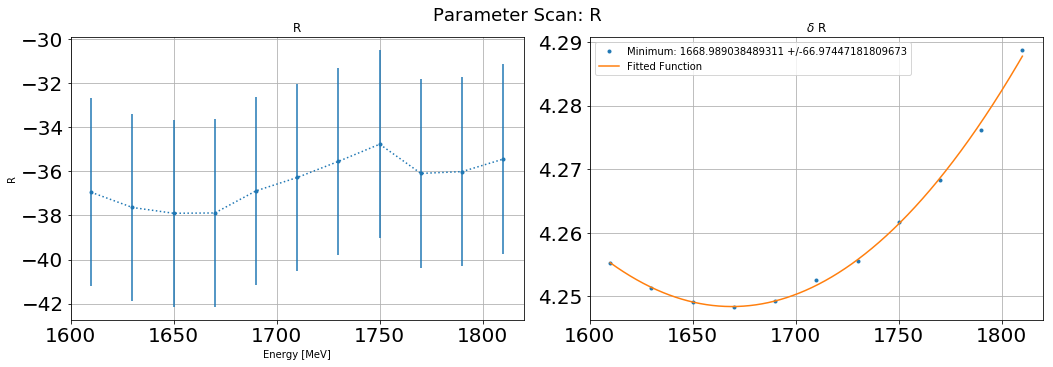

Starting calo 4


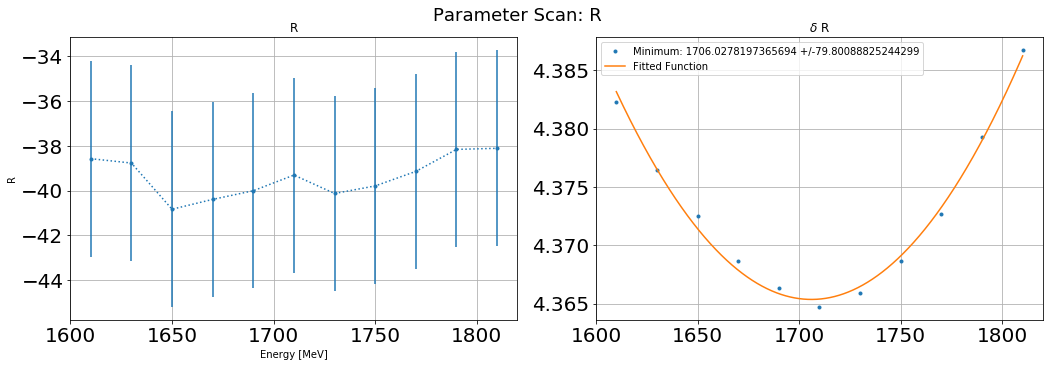

Starting calo 5


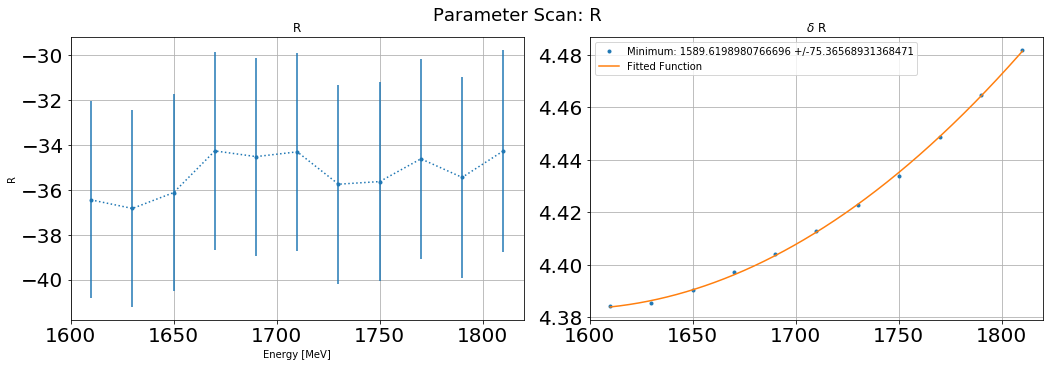

Starting calo 6


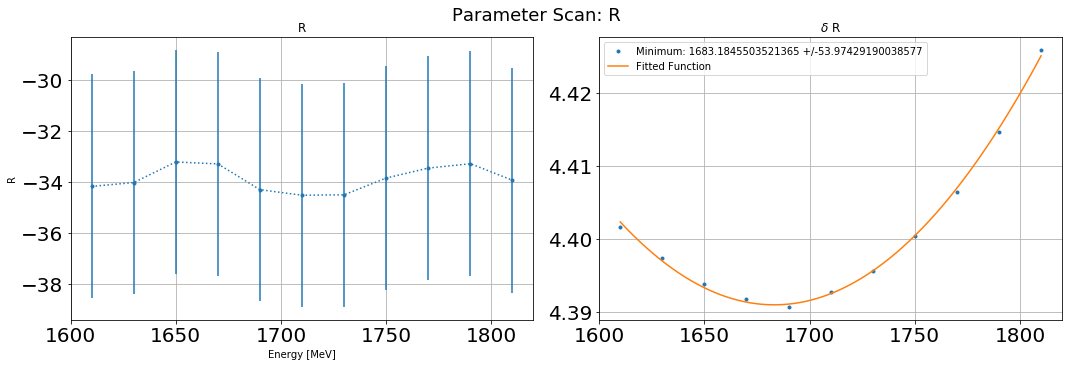

Starting calo 7


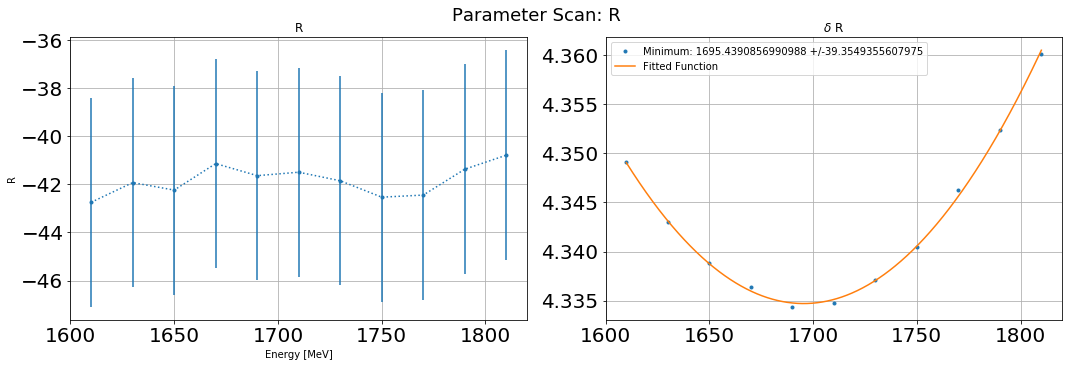

Starting calo 8


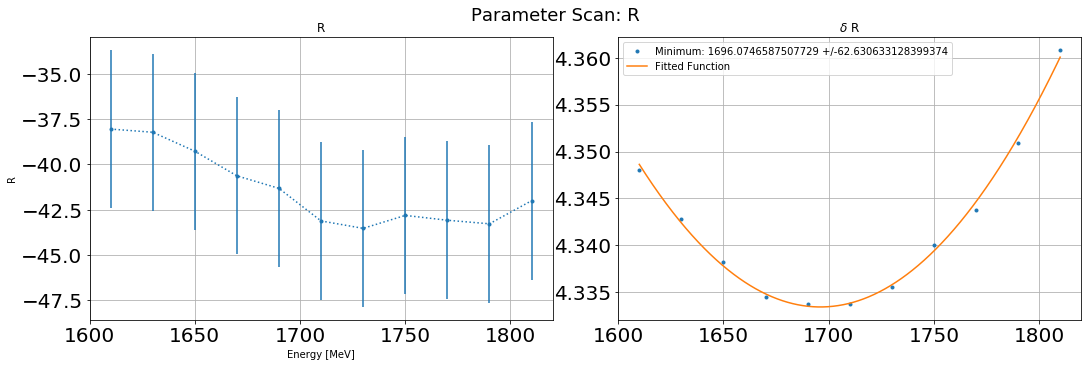

Starting calo 9


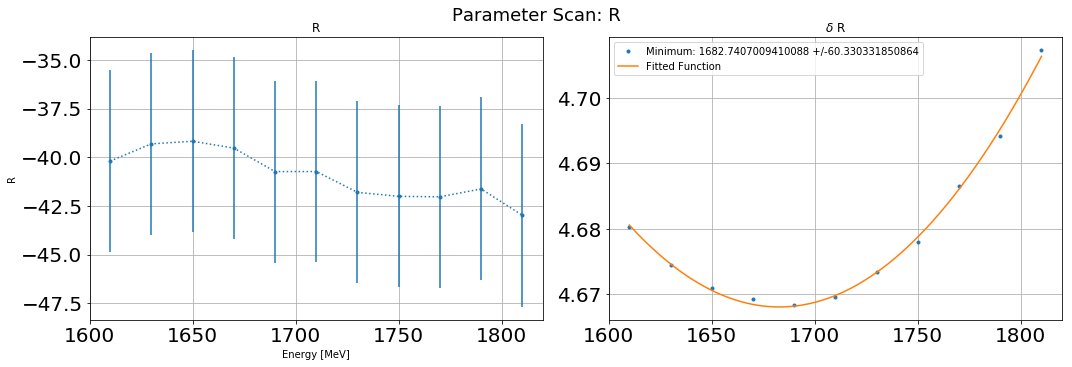

Starting calo 10


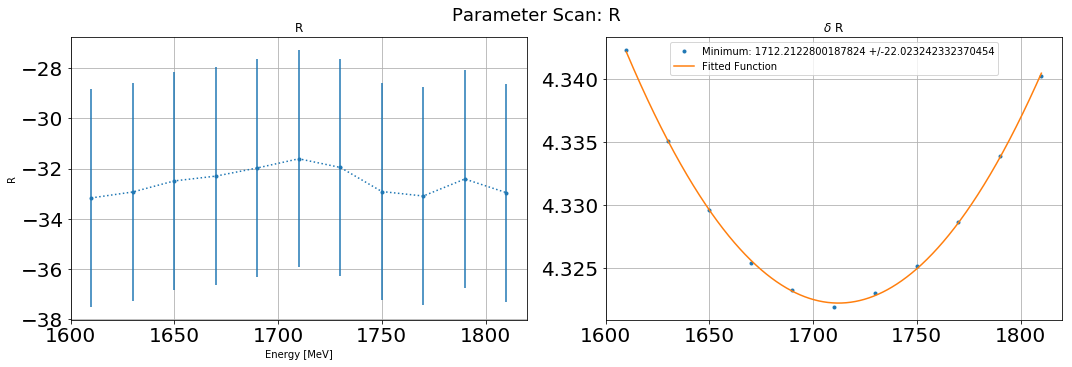

Starting calo 11


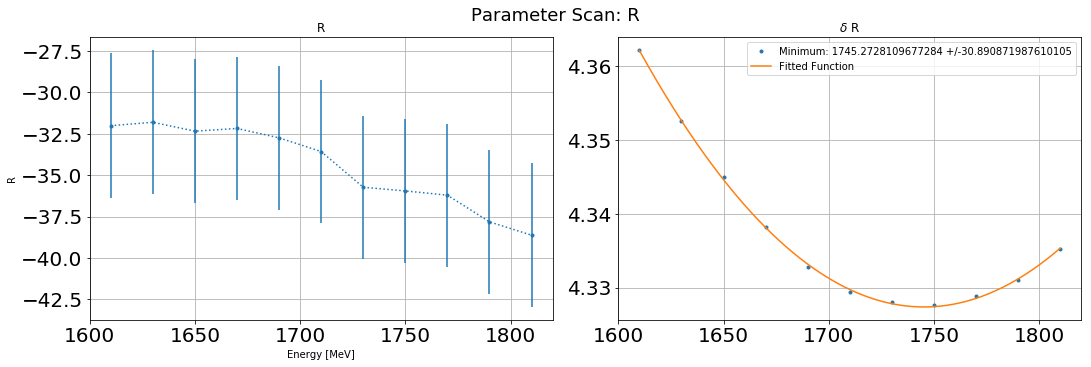

Starting calo 12


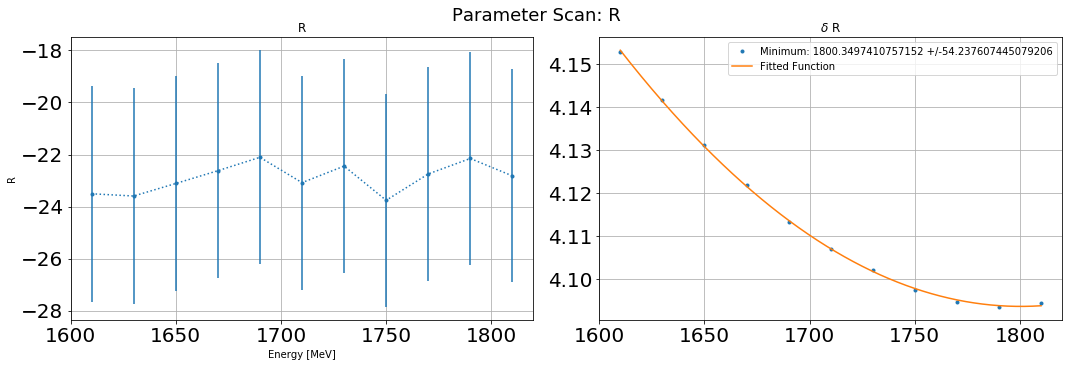

Starting calo 13


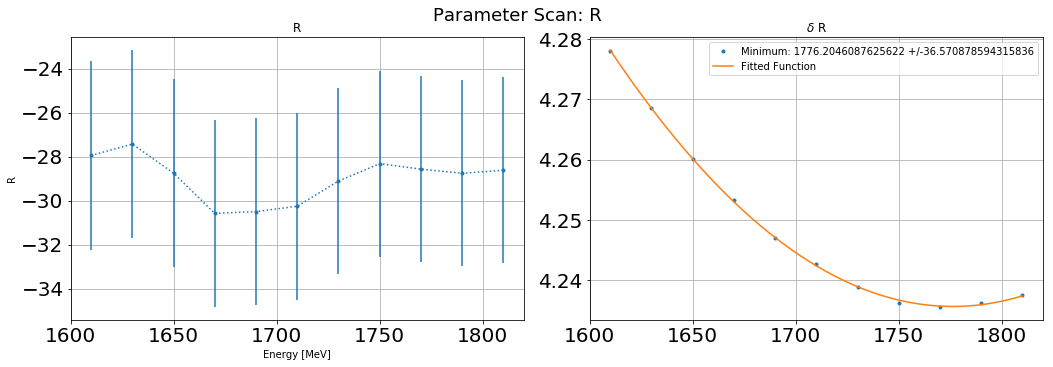

Starting calo 14


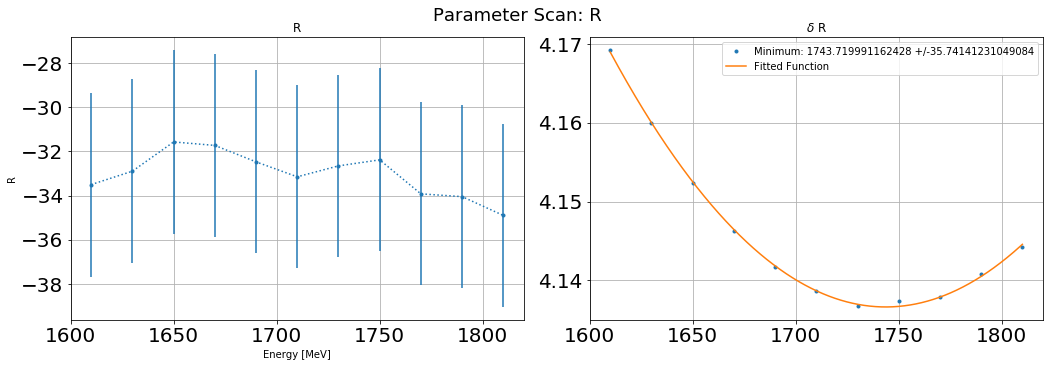

Starting calo 15


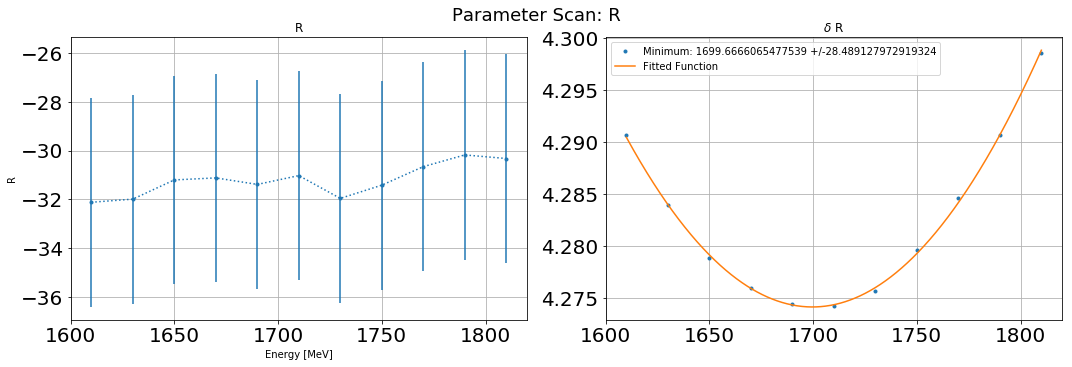

Starting calo 16


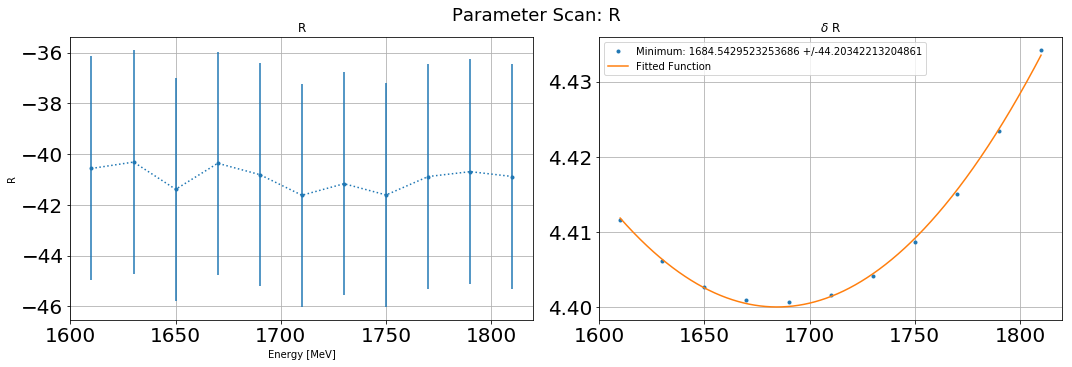

Starting calo 17


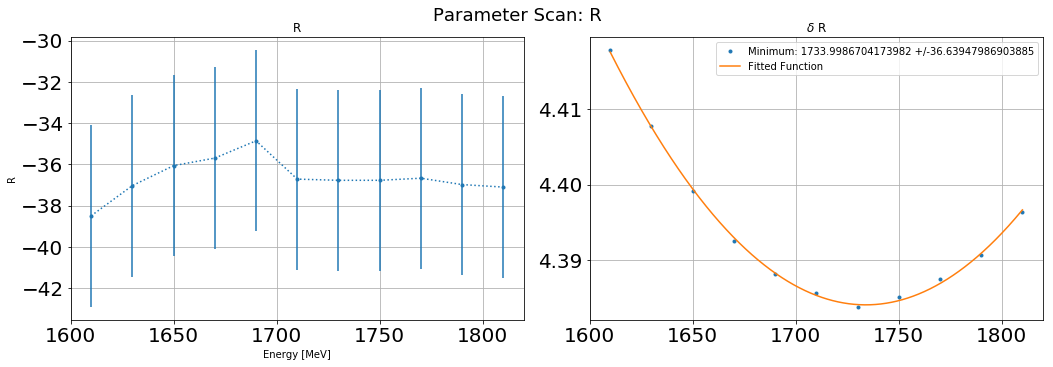

Starting calo 18


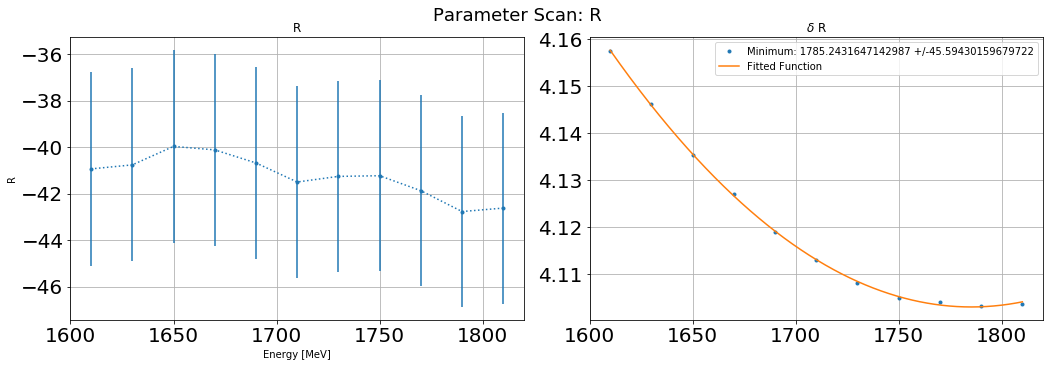

Starting calo 19


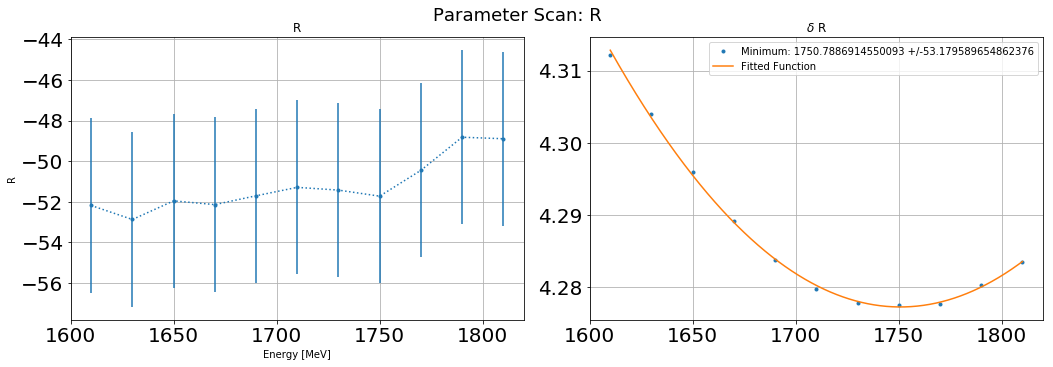

Starting calo 20


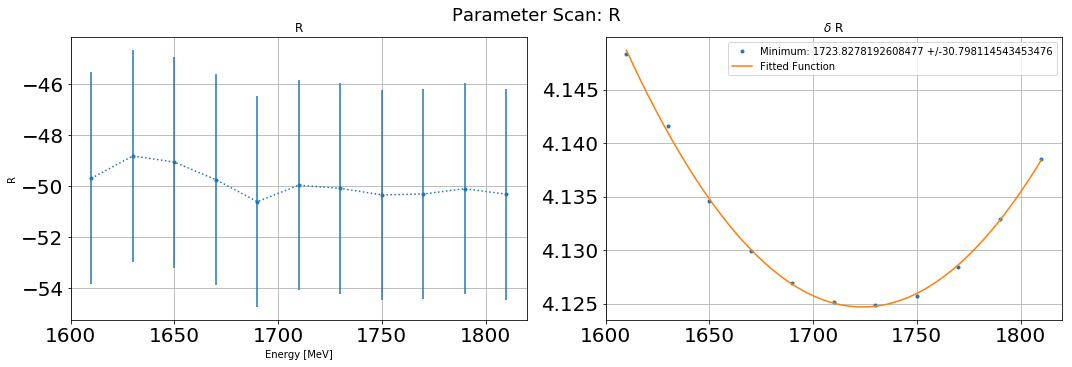

Starting calo 21


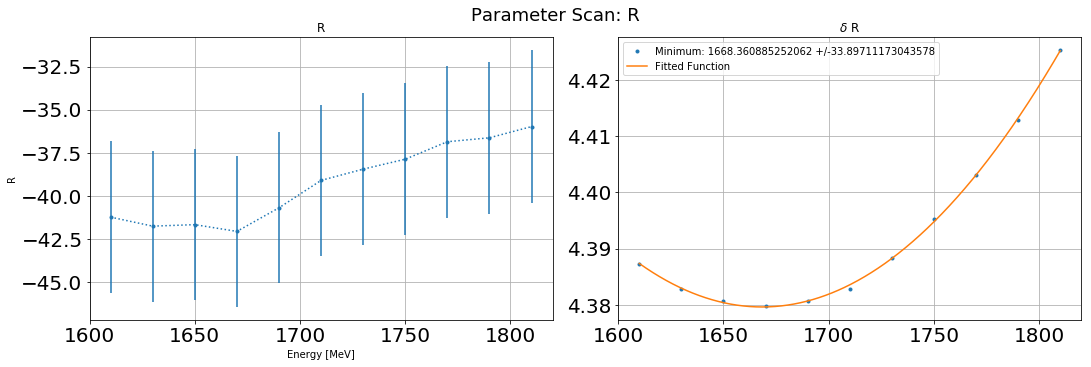

Starting calo 22


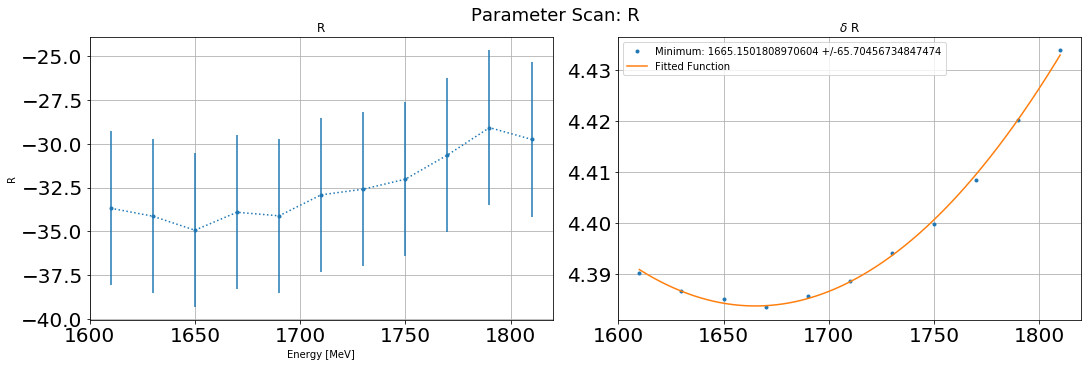

Starting calo 23


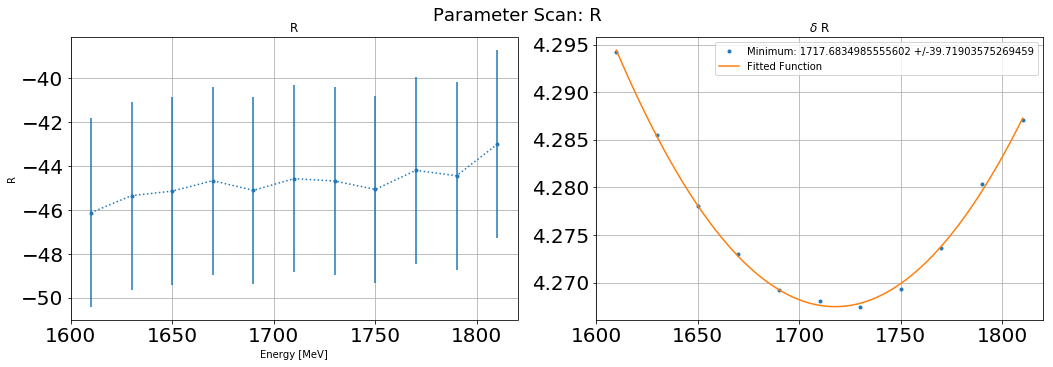

Starting calo 24


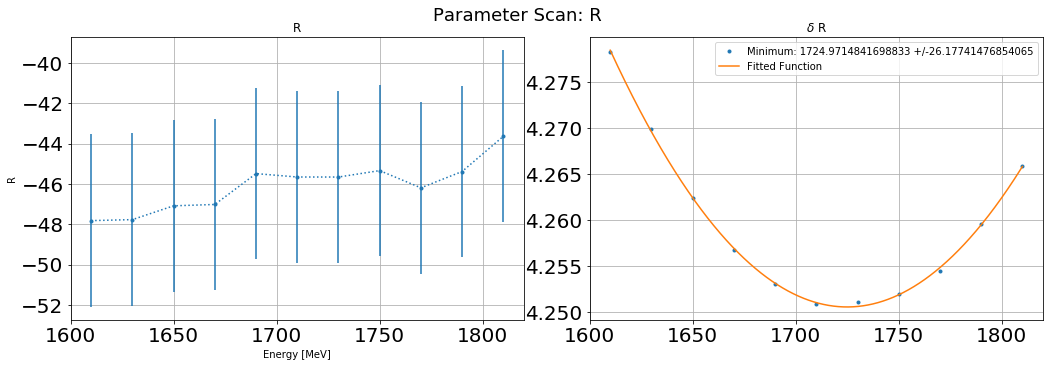

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                    

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not

In [21]:
pars = []
energyScans = []
for calo in range(25):
    print("Starting calo", calo)
    ding = EnergyThresholdScan(clusters, e1_nominal, e2, deltaE, binOrEnergy, calo,  upperOrLower, verbosity = 0)
    energyScans.append(ding)
    ding.PlotParameterVsBin(3)
    pars.append( (calo, ding.inflectionPoint) )

---

### Now lets see how they compare

In [22]:
print(pars)

[(0, [None, None, None, 1710.167571174043+/-16.961930578799926, None]), (1, [None, None, None, 1772.6754746484503+/-37.54092168048386, None]), (2, [None, None, None, 1661.8570941645662+/-48.61082556897182, None]), (3, [None, None, None, 1668.989038489311+/-66.97447181809673, None]), (4, [None, None, None, 1706.0278197365694+/-79.80088825244299, None]), (5, [None, None, None, 1589.6198980766696+/-75.36568931368471, None]), (6, [None, None, None, 1683.1845503521365+/-53.97429190038577, None]), (7, [None, None, None, 1695.4390856990988+/-39.3549355607975, None]), (8, [None, None, None, 1696.0746587507729+/-62.630633128399374, None]), (9, [None, None, None, 1682.7407009410088+/-60.330331850864, None]), (10, [None, None, None, 1712.2122800187824+/-22.023242332370454, None]), (11, [None, None, None, 1745.2728109677284+/-30.890871987610105, None]), (12, [None, None, None, 1800.3497410757152+/-54.237607445079206, None]), (13, [None, None, None, 1776.2046087625622+/-36.570878594315836, None]), 

In [23]:
calos, Rs = zip(*pars)

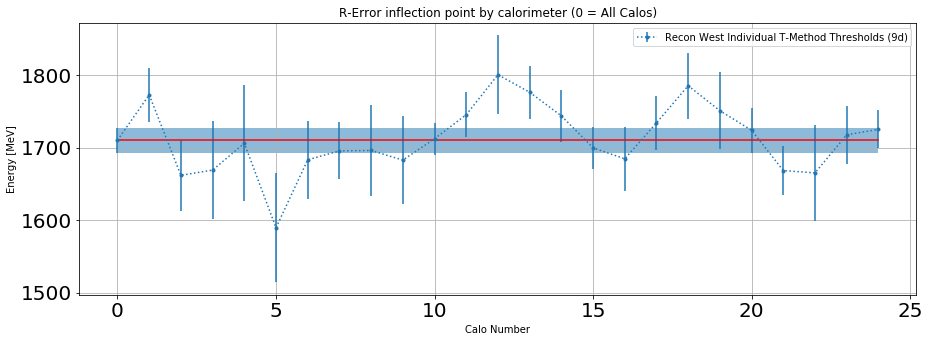

In [48]:
fig,ax = plt.subplots(figsize=(15,5))
plt.errorbar(calos,[r[3].n for r in Rs],yerr=[r[3].s for r in Rs],fmt=".:",label = "Recon West Individual T-Method Thresholds (9d)")
#plt.errorbar(calos,[r[3].n for r in Rs],yerr=[0 for r in Rs],fmt=".:")
plt.plot( [x for x in range(25)], [Rs[0][3].n for x in range(25)], "r" )
plt.fill_between([x for x in range(25)], Rs[0][3].n - Rs[0][3].s, Rs[0][3].n + Rs[0][3].s, alpha = 0.5 )

plt.title("R-Error inflection point by calorimeter (0 = All Calos)")
plt.xlabel("Calo Number")
plt.ylabel("Energy [MeV]")
plt.grid()
plt.legend()
plt.show()

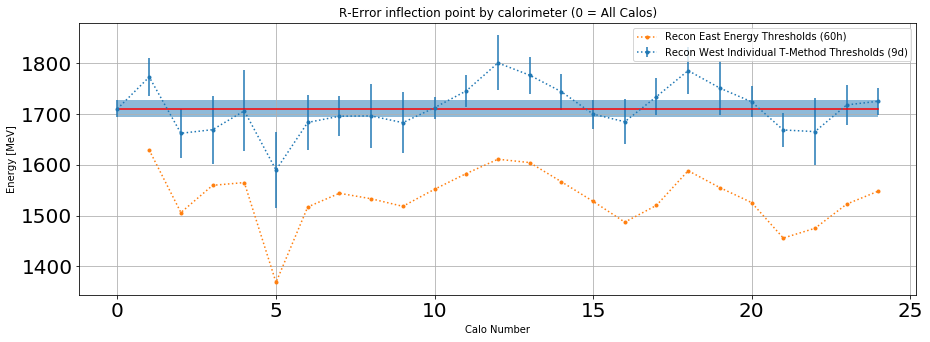

In [40]:
fig,ax = plt.subplots(figsize=(15,5))
plt.errorbar(calos,[r[3].n for r in Rs],yerr=[r[3].s for r in Rs],fmt=".:",label = "Recon West Individual T-Method Thresholds (9d)")
#plt.errorbar(calos,[r[3].n for r in Rs],yerr=[0 for r in Rs],fmt=".:")
plt.plot( [x for x in range(25)], [Rs[0][3].n for x in range(25)], "r-" )
plt.fill_between([x for x in range(25)], Rs[0][3].n - Rs[0][3].s, Rs[0][3].n + Rs[0][3].s, alpha = 0.5 )
reconEastEnergyConstants = [1628.9,1505.9,1559.4,1564.9,1368.3,1516.9,1543.8,1533.0,1518.1,1551.7,1582.6,1610.8,1604.2,1566.5,
                            1528.0,1487.0,1520.0,1588.2,1554.9,1525.5,1455.7,1474.9,1522.5,1548.1]
plt.plot([x for x in range(1,25)], reconEastEnergyConstants, ".:", label="Recon East Energy Thresholds (60h)")

plt.title("R-Error inflection point by calorimeter (0 = All Calos)")
plt.xlabel("Calo Number")
plt.ylabel("Energy [MeV]")
plt.grid()
plt.legend()
plt.show()